In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
train_ratings = pd.read_csv('../data/train_ratings.csv')
test_ratings = pd.read_csv('../data/test_ratings.csv')

In [40]:
train_ratings

,user_id,isbn,rating
0,8,0002005018,4
1,67544,0002005018,7
2,123629,0002005018,8
3,200273,0002005018,8
4,210926,0002005018,9
...,...,...,...
306790,278843,0743525493,7
306791,278851,067161746X,6
306792,278851,0884159221,7
306793,278851,0912333022,7


In [41]:
test_ratings

,user_id,isbn,rating
0,11676,0002005018,0
1,116866,0002005018,0
2,152827,0060973129,0
3,157969,0374157065,0
4,67958,0399135782,0
...,...,...,...
76694,278543,1576734218,0
76695,278563,3492223710,0
76696,278633,1896095186,0
76697,278668,8408044079,0


test 유저의 약 31.6%가 train에 없음  
cold start 문제 발생 가능성

In [42]:
train_user = set(train_ratings.user_id)
test_user = set(test_ratings.user_id)

print('test 유저 수', len(test_user))
print('train에는 없고, test에만 있는 유저 수:', len(test_user - train_user))
print('train에는 없고, test에만 있는 유저 비율:', round(len(test_user - train_user) / len(test_user), 3))



test 유저 수 26167
train에는 없고, test에만 있는 유저 수: 8266
train에는 없고, test에만 있는 유저 비율: 0.316


<Axes: xlabel='rating', ylabel='Count'>

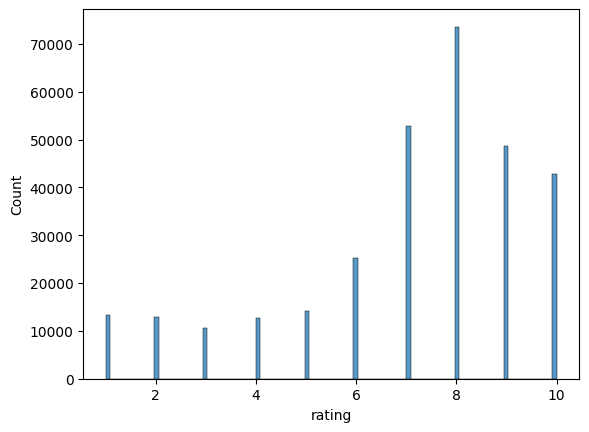

In [43]:
sns.histplot(train_ratings['rating'])

책을 굉장히 많이 읽는 헤비 유저들이 존재하고, Top 10을 봤을 때 train/test 모두 동일한 사람

In [45]:
train_ratings.groupby('user_id')['rating'].count().sort_values(ascending=False)[:10]

user_id
11676     5520
98391     4560
189835    1503
153662    1496
23902      956
235105     812
76499      810
171118     771
16795      760
248718     747
Name: rating, dtype: int64

In [46]:
test_ratings.groupby('user_id')['rating'].count().sort_values(ascending=False)[:10]

user_id
11676     1419
98391     1125
189835     396
153662     347
23902      223
235105     208
76499      201
16795      198
248718     194
171118     189
Name: rating, dtype: int64